In [9]:
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df

# 첫 5행 출력
print(df.head())

# 요약 정보
df.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [21]:
# 누락 데이터 확인 - isnull()-True(누락), False(누락안됨), notnull()
df.head().isnull()

# 누락 데이터 총 개수 계산
# df.head().isnull().sum()
df.isnull().sum()

# value_counts()  - NaN(Not a Number- null)의 개수를 파악
df['deck'].value_counts(dropna=False)

df['age'].value_counts(dropna=False)

# age 행의 누락데이터 확인
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

##### 누락 데이터 확인 
##### missingno 라이브러리 : 데이터프레임 내부에 포함된 누락데이터의 분포와 패턴을 쉽게
파악할 수 있는 시각화 도구이다.

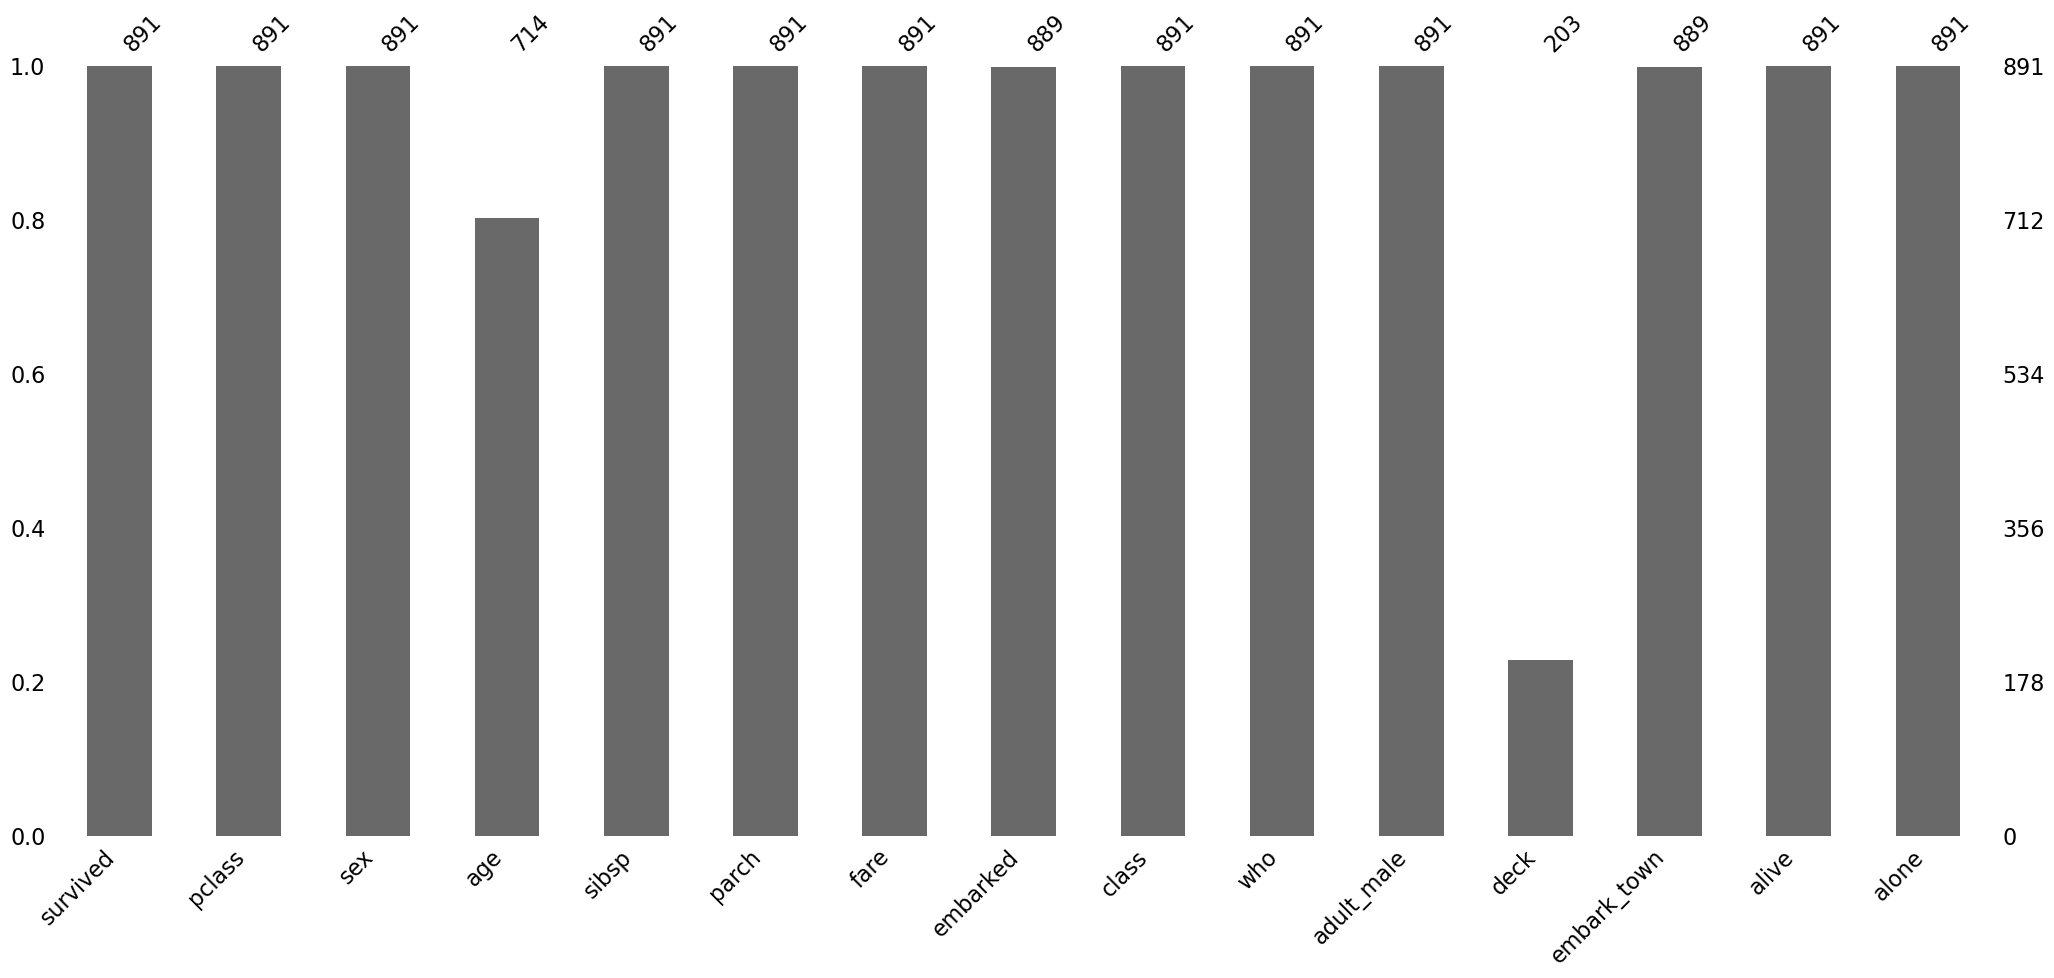

In [34]:
# !pip install missingno

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
# df

# msno의 matrix() - 데이터프레임의 누락 데이터 분포를 매트릭스 형태로 시각화 함
# msno.matrix(df)

msno.bar(df) #막대 그래프
plt.show()

##### axis : {0: index / 1: columns} 결측치 제거를 진행 할 레이블입니다.
##### how : {'any' : 존재하면 제거 / 'all' : 모두 결측치면 제거} 제거할 유형입니다. 
##### thresh : 결측값이 몇 개 이상인 경우 적용시키는 인수입니다.
##### subset : dropna 메서드를 수행할 레이블을 지정합니다.
##### inplace : 원본을 변경할지의 여부입니다.
부입니다.

In [40]:
# 누락 데이터 삭제 - dropna() 메서드 사용, Nan값이 500개 이상인 열 삭제
# 'deck'열 삭제 - thresh = 500지정, axis=1
df_thresh = df.dropna(axis=1, thresh=500)
# 삭제후 남아 있는 칼럼
print(df_thresh.columns)

# drop() 매서드 사용하여 삭제 - 'deck'
# df = df.drop(columns = 'deck', axis = 1)
# print(df.columns)

# age열에 데이터가 없는 모든 행 삭제
# subset을 'age'열로 한정하면 'age'열의 행 중에서 NaN값이 있는 모든 행 삭제
df_age = df.dropna(subset=['age'], how='any', axis=0)
# 삭제후 행의 개수
print(len(df_age))
print(df_age.head(10))

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')
714
    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0 

In [117]:
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
# df
# df.info()

# 누락 데이터 대체 - fillna()
# 1 평균(mean()), 2.최빈값(mode())
print(df['age'].head(10))

# age 행의 평균
mean_age = df['age'].mean(axis=0)
# print(mean_age)

# fillna(평균값)
mean_age = df['age'].fillna(mean_age)
# print(mean_age)
print(mean_age.head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [119]:
# 최빈값으로 대체하기 - fillna(최빈값)
# df.info()
# 승선한 도시의 NaN을 최빈값으로 대체하기
print(df['embark_town'][820:831])

most_freq = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(most_freq)
print(df['embark_town'][820:831])

820    Southampton
821    Southampton
822    Southampton
823    Southampton
824    Southampton
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
820    Southampton
821    Southampton
822    Southampton
823    Southampton
824    Southampton
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object
